# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**.


## 1. Introdução

Uma determinada fintech focada em consumidores finais pessoa física constataou um grande número de fraudes em transações bancárias.

O setor de fraudes apontou que existem clientes que se queixaram de não contratar serviços específicos, como o crédito pessoal, e após isso transferir para outras contas desconhecidas.

Após análises pelas equipes de segurança, os protocolos de utilização da senha foram realizados em conformidade, ou seja, cada cliente autenticou com sua própria senha de maneira regular.

Em função disso, o banco precisa arcar com reembolsos e medidas de contenção para evitar processos judiciais, pois os clientes alegam terem sido invadidos por hackers ou algo parecido.

Uma das formas de solucionar ou minimizar este problema é com a utilização de outras formas de autenticação, sobretudo em operações críticas, como a obtenção de crédito pessoal.

Desta forma podemos implementar uma verificação de identidade com prova de vida (liveness), que utilize uma verificação e identificação facial.

Caso o cliente não seja autenticado, ele será atendido por uma esteira dedicada e as evidências da não identificação serão encaminhadas para a área de IA para validação dos parâmetros e limiares para aperfeiçoamento do modelo.

Será necessário construir:

* Detector de faces
* Identificação de faces (podendo ser um comparador entre um rosto de documento e outra da prova de vida)
* Detecção de vivacidade (liveness) para evitar que um fraudador utilize uma foto estática.


>Formas alternativas de prover a identificação e prova de vivacidade, além destas que foram solicitadas poderão ser submetidas.


<p align="center">
    <img src="imagens/liveness.jpg">
</p>

Imagem retirada do [Grunge](https://www.grunge.com/192826/company-testing-robocop-facial-recognition-software-with-us-police/).

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Iremos constuir uma forma de validar se uma determinada imagem foi ou não adulterada e se trata de uma produção fraudade.

Existem diversas formas de validar a vivacidade, e neste sentido conto com a criatividade de vocês dado que já dominam encontrar uma face numa imagem, aplicar marcos faciais e até mesmo construir uma rede neural convulacional.

A abordagem mais simples é pela construção de uma rede neural com imagens de fotos de rostos de outras fotos e fotos de rostos sem modificações. Tal classificador deverá classificar se dada imagem possui vivacidade ou não com uma pontuação de probabilidade.

Referências que abordam o tema para servir de inspiração:

1. [PyImageSearch](https://pyimagesearch.com/2019/03/11/liveness-detection-with-opencv/), Liveness detection with OpenCV;
2. [Kickertech](https://kickertech.com/face-liveness-detection-via-opencv-and-tensorflow/), Liveness detection via OpenCV and Tensorflow.
3. [Towards Data Science](https://towardsdatascience.com/real-time-face-liveness-detection-with-python-keras-and-opencv-c35dc70dafd3?gi=24f8e1b740f9), Real-time face liveness detection with Python, Keras and OpenCV.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Integrante 1             | RM 12345      | XIA |
| Integrante 2             | RM 12345      | XIA |
| Integrante 3             | RM 12345      | XIA |
| Integrante 4             | RM 12345      | XIA |

## 3. Abordagem e organização da solução do problema (2 pontos)

Como o grupo pretende deteccar a prova de vivacidade de uma determinada imagem? Quais os passos e os building blocks deste processo?


Com base na sólida arquitetura do MobileNet, nossa equipe planeja incorporar técnicas avançadas de detecção de vivacidade em imagens, aprimorando ainda mais a capacidade do modelo. Inicialmente, conduziremos uma coleta abrangente e uma preparação minuciosa dos dados. Em seguida, procederemos ao treinamento do modelo, realizando ajustes estratégicos para garantir um desempenho otimizado.

Após a fase de treinamento, realizaremos uma avaliação rigorosa do desempenho do modelo, empregando métricas específicas e analisando os resultados obtidos. Além disso, planejamos conduzir simulações extensivas para verificar a robustez e eficácia do modelo em diversas situações, proporcionando uma compreensão abrangente de sua capacidade de generalização.

Ao longo desse processo, estaremos atentos a refinamentos contínuos, ajustes de parâmetros e a implementação de estratégias de otimização, visando alcançar uma detecção de vivacidade de alto desempenho e confiabilidade. Essa abordagem abrangente visa não apenas atender, mas também superar as expectativas em termos de qualidade e eficiência na detecção de vivacidade em imagens.

**Resposta**:

## 4 Desenvolvimento da solução (5,5 pontos)

Detalhe o passo-a-passo do algoritmo de deteção de vivacidade.
Se optar pela construção e treinamento de um modelo de redes neurais convulucionais, apresente a arquitetura, prepare os dados de treinamento, realize o treinamento.

### 4.1 Organização de dados para treinamento de modelo de liveness (2 pontos)

In [22]:
import cv2
import numpy as np
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split

def load_images_and_labels(urls, label):
    images = []
    labels = []
    for url in urls:
        try:
            response = requests.get(url)
            if response.status_code == 200:
                img = cv2.imdecode(np.asarray(bytearray(response.content)), 1)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, (224, 224))
                    img = img.astype('float32') / 255.0
                    images.append(img)
                    labels.append(label)
            else:
                print(f"Error downloading image from URL: {url}")
        except Exception as e:
            print(f"Error processing image from URL: {url}. Error: {e}")
    return np.array(images), np.array(labels)

real_face_urls = [
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.38%20PM%20(1).jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.37%20PM.jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.38%20PM%20(2).jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.38%20PM%20(3).jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.38%20PM.jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.39%20PM%20(1).jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.39%20PM.jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.40%20PM.jpeg",
    "https://github.com/danielselga/trab-final-computer-vision/blob/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.41%20PM.jpeg"
]

fake_face_urls = [
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.29%20PM.jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.30%20PM%20(1).jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.30%20PM.jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.31%20PM%20(1).jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.31%20PM.jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.32%20PM%20(1).jpeg",
    "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.33%20PM.jpeg"
]

real_face_images, real_face_labels = load_images_and_labels(real_face_urls, 1)
fake_face_images, fake_face_labels = load_images_and_labels(fake_face_urls, 0)

X = np.concatenate((real_face_images, fake_face_images), axis=0)
y = np.concatenate((real_face_labels.reshape(-1, 1), fake_face_labels.reshape(-1, 1)), axis=0)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Number of training images:", X_train.shape[0])
print("Number of validation images:", X_val.shape[0])
print("Number of test images:", X_test.shape[0])

Number of training images: 10
Number of validation images: 2
Number of test images: 3


### 4.2 Treinamento de modelo de liveness (1,5 pontos)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet

def create_mobilenet(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = DepthwiseConv2D(kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, kernel_size=(1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = GlobalAveragePooling2D()(x)

    output_tensor = Dense(num_classes, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)
    return model

input_shape = (224, 224, 3)  # Input size of images
num_classes = 1


model = create_mobilenet(input_shape, num_classes)

batch_size = 16
epochs = 20
learning_rate = 0.001


optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 112, 112, 32)      0         
                                                                 
 depthwise_conv2d (Depthwis  (None, 112, 112, 32)      320       
 eConv2D)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 32)      128   

### 4.3 Métricas de desempenho do modelo (2 pontos)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 0s 230ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Confusion Matrix:
[[0 1]
 [0 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5 Teste Fim-a-Fim

Simule a operação fim-a-fim, com uma imagem de entrada forjada (foto de foto de um rosto) e outra com uma imagem de rosto, exibindo o resultado da classificação e a pontuação de cada classe.

1/1 [==============================] - 0s 52ms/step


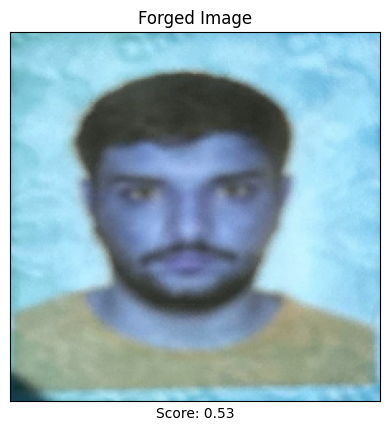

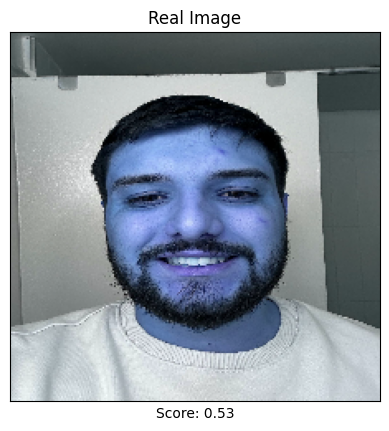

In [21]:
import matplotlib.pyplot as plt
import cv2
import requests
import numpy as np

def show_result(image, title, score):
    plt.imshow(image)
    plt.title(title)
    plt.xlabel(f"Score: {score:.2f}")
    plt.xticks([]), plt.yticks([])
    plt.show()

forged_image_url = "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/fake/WhatsApp%20Image%202024-02-07%20at%2010.43.29%20PM.jpeg"
real_image_url = "https://raw.githubusercontent.com/danielselga/trab-final-computer-vision/main/real/WhatsApp%20Image%202024-02-07%20at%2010.37.40%20PM%20(1).jpeg"

forged_image_response = requests.get(forged_image_url)
real_image_response = requests.get(real_image_url)

if forged_image_response.status_code == 200 and real_image_response.status_code == 200:
    forged_image_content = np.asarray(bytearray(forged_image_response.content), dtype="uint8")
    real_image_content = np.asarray(bytearray(real_image_response.content), dtype="uint8")

    forged_image = cv2.imdecode(forged_image_content, cv2.IMREAD_COLOR)
    real_image = cv2.imdecode(real_image_content, cv2.IMREAD_COLOR)

    forged_image = cv2.resize(forged_image, (224, 224)) / 255.0
    real_image = cv2.resize(real_image, (224, 224)) / 255.0

    score_forged = model.predict(np.expand_dims(forged_image, axis=0))[0][0]
    score_real = model.predict(np.expand_dims(real_image, axis=0))[0][0]

    show_result(forged_image, "Forged Image", score_forged)
    show_result(real_image, "Real Image", score_real)
else:
    print("Error loading images from URLs.")


>Com a implementação da solução na forma de uma aplicação do [Streamlit](https://www.streamlit.io/) (veja a pata streamlit-app e use o template) vale 1 ponto adicional.

**Pergunta**: Se utilizou o Streamlit, compartilhe a URL do aplicativo publicado:

**Resposta**:

## 6 Conclusões (2,5 pontos)

**Pergunta**: Dado todo o estudo e pesquisa, quais foram as conclusões sobre a solução, o que funcionou, o que não funcionou e quais os detalhes que observariam numa nova versão e melhorias do processo?

**Resposta**:

